Jupyter Notebook by Minne Schepers

For splitting the data into males and females, and into training and test group

Reviewed by Bernardo Maciel @ Amsterdam UMC, 06-05-2022

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
df = pd.read_csv('./data/cognitive/HCP_Aging_cog.csv')

Split into females and females

In [3]:
males = df[df['sex']=='M']
males = males.reset_index()
females = df[df['sex']=='F']
females = females.reset_index()
print(females.shape)
print(females.shape)

(406, 42)
(406, 42)


In [4]:
df_columns = df.columns
to_remove = [i for i in df_columns if '_np' in i]
df = df.drop(to_remove, axis=1)

In [5]:
df = df.drop('deldisc_auc200', axis=1)
df = df.drop('deldisc_auc40000', axis=1)

In [6]:
df.notnull().sum()

subject                     725
sex                         725
age_months                  725
age_years                   724
moca_total_score            725
years_of_education          724
fluidcog_unadjusted         632
fluidcog_age                632
crystalcog_unadjusted       616
crystalcog_age              607
earlychildcog_unadjusted    615
earlychildcog_age           608
totalcog_unadjusted         615
totalcog_age                607
dccs_unadjusted             619
dccs_age                    611
flanker_unadjusted          619
flanker_age                 611
lswmt_unadjusted            620
lswmt_age                   612
orrt_unadjusted             620
orrt_age                    611
pcps_unadjusted             620
pcps_age                    612
picseq_unadjusted           634
picseq_age                  634
pvt_age                     611
pvt_unadjusted              619
dtype: int64

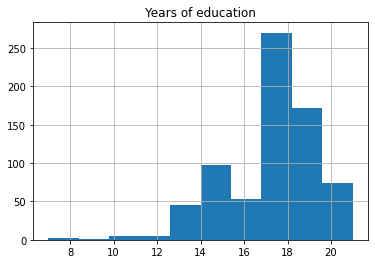

In [7]:
df['years_of_education'].hist()
plt.title('Years of education')
plt.savefig('./derivatives/YoE.png')
plt.show()

# Females & Males Datasets descriptive statistics

Number of rows per column in females:

In [8]:
females.notnull().sum()

index                       406
subject                     406
sex                         406
age_months                  406
age_years                   406
moca_total_score            406
years_of_education          406
fluidcog_unadjusted         364
fluidcog_age                364
fluidcog_np                 364
crystalcog_unadjusted       358
crystalcog_age              348
crystalcog_np               328
earlychildcog_unadjusted    358
earlychildcog_age           348
earlychildcog_np            328
totalcog_unadjusted         358
totalcog_age                348
totalcog_np                 328
dccs_unadjusted             360
dccs_age                    350
dccs_np                     152
deldisc_auc200              403
deldisc_auc40000            403
flanker_unadjusted          360
flanker_age                 350
flanker_np                  152
lswmt_unadjusted            360
lswmt_age                   350
lswmt_np                    152
orrt_unadjusted             360
orrt_age

In [9]:
males.notnull().sum()

index                       319
subject                     319
sex                         319
age_months                  319
age_years                   318
moca_total_score            319
years_of_education          318
fluidcog_unadjusted         268
fluidcog_age                268
fluidcog_np                 268
crystalcog_unadjusted       258
crystalcog_age              259
crystalcog_np               250
earlychildcog_unadjusted    257
earlychildcog_age           260
earlychildcog_np            251
totalcog_unadjusted         257
totalcog_age                259
totalcog_np                 250
dccs_unadjusted             259
dccs_age                    261
dccs_np                     147
deldisc_auc200              316
deldisc_auc40000            316
flanker_unadjusted          259
flanker_age                 261
flanker_np                  147
lswmt_unadjusted            260
lswmt_age                   262
lswmt_np                    147
orrt_unadjusted             260
orrt_age

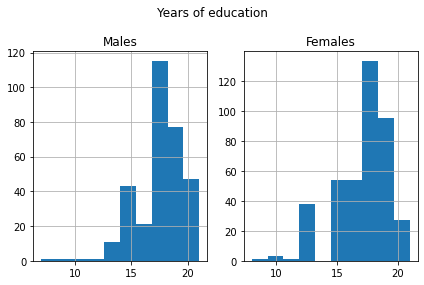

In [10]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Years of education')
axes[0].title.set_text('Males')
axes[1].title.set_text('Females')
males['years_of_education'].hist(ax= axes[0])
females['years_of_education'].hist(ax= axes[1])
plt.savefig('./derivatives/plots/YoE_comparision.png')
plt.tight_layout()
plt.show()

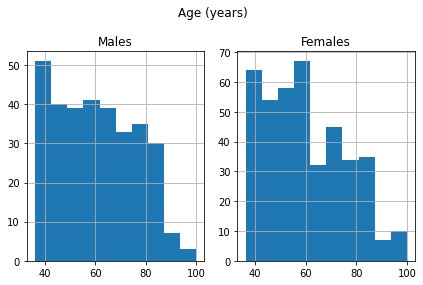

In [11]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Age (years)')
axes[0].title.set_text('Males')
axes[1].title.set_text('Females')
males['age_years'].hist(ax= axes[0])
females['age_years'].hist(ax= axes[1])
plt.savefig('./derivatives/plots/Age_comparision.png')
plt.tight_layout()
plt.show()

Show correlation values between cognitive scores in females and age/education/moca scores

In [12]:
all_columns = females.columns
age_columns = [i for i in all_columns if '_age' in i]
standard_columns = ['subject', 'sex', 'age_months', 'age_years', 'moca_total_score',
       'years_of_education']

In [13]:
females_age = females[standard_columns + age_columns]
males_age = males[standard_columns + age_columns]

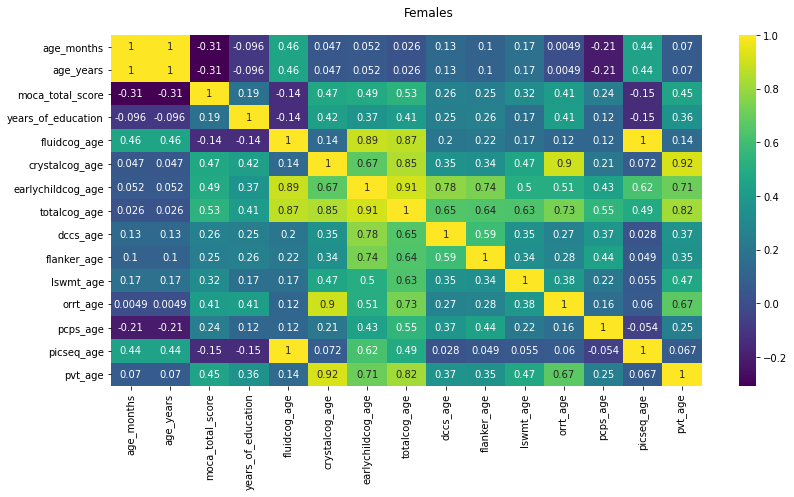

In [14]:
fig, ax = plt.subplots(figsize=(12,7))
fig.suptitle('Females')
sns.heatmap(females_age.corr(), annot=True, cmap='viridis')
plt.tight_layout()

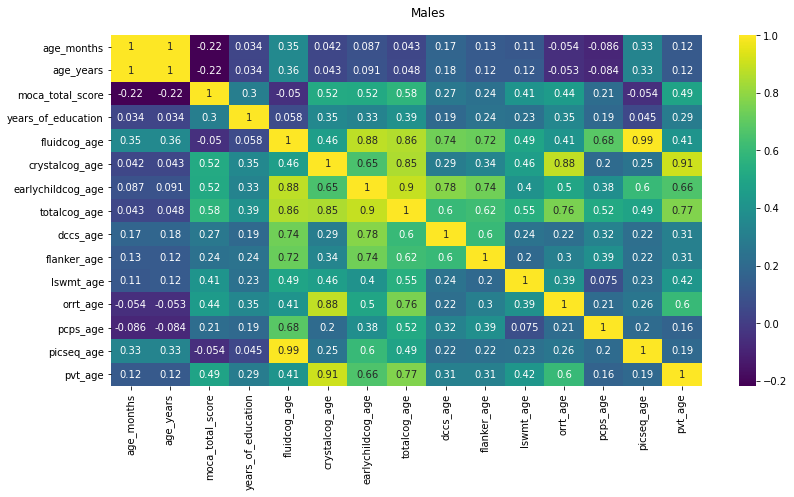

In [15]:
fig, ax = plt.subplots(figsize=(12,7))
fig.suptitle('Males')
sns.heatmap(males_age.corr(), annot=True, cmap='viridis')
plt.tight_layout()

# Split data into test part and training part
## Females

In [16]:
# Split on age_years:

# Organize data into 3 bins
bins = np.linspace(50, 100, 3)
print(bins)
y = females['age_years']
y_binned = np.digitize(y, bins)

[ 50.  75. 100.]


In [17]:
# Split on years_of_education

bins2 = np.linspace(16, 20, 3)
print(bins2)
y2 = females['years_of_education']
y_binned2 = np.digitize(y2, bins2)

[16. 18. 20.]


In [18]:
# Do not split on moca_total_score, because not enough data in dataset (insufficient nr of rows per group)

# bins3 = np.linspace(18, 30, 3)
# print(bins3)
# # Split on years_of_education
# y3 = females['moca_total_score']
# y_binned3 = np.digitize(y3, bins3)

In [19]:
y_stacked = np.vstack((y_binned, y_binned2))
y_stacked = y_stacked.T
y_stacked.shape

(406, 2)

In [20]:
# Perform split
females_train, females_test = train_test_split(females, stratify=y_binned, test_size=0.5)
print(females_train.shape)
print(females_train.shape)

(203, 42)
(203, 42)


Check nr non-nan values

In [21]:
non_nan_values = pd.DataFrame()
non_nan_values['train'] = females_train.notnull().sum()
non_nan_values['test'] = females_test.notnull().sum()
non_nan_values

,train,test
index,203,203
subject,203,203
sex,203,203
age_months,203,203
age_years,203,203
moca_total_score,203,203
years_of_education,203,203
fluidcog_unadjusted,181,183
fluidcog_age,181,183
fluidcog_np,181,183


## Males

In [22]:
# Split on age_years:

# Organize data into 3 bins
bins = np.linspace(50, 100, 3)
print(bins)
y = males['age_years']
y_binned = np.digitize(y, bins)

[ 50.  75. 100.]


In [23]:
# Split on years_of_education

bins2 = np.linspace(16, 20, 3)
print(bins2)
y2 = males['years_of_education']
y_binned2 = np.digitize(y2, bins2)

[16. 18. 20.]


In [24]:
y_stacked = np.vstack((y_binned, y_binned2))
y_stacked = y_stacked.T
y_stacked.shape

(319, 2)

In [25]:
# Perform split
males_train, males_test = train_test_split(males, stratify=y_binned, test_size=0.5)
print(males_train.shape)
print(males_test.shape)

(159, 42)
(160, 42)


# Plot data for checking of distributions

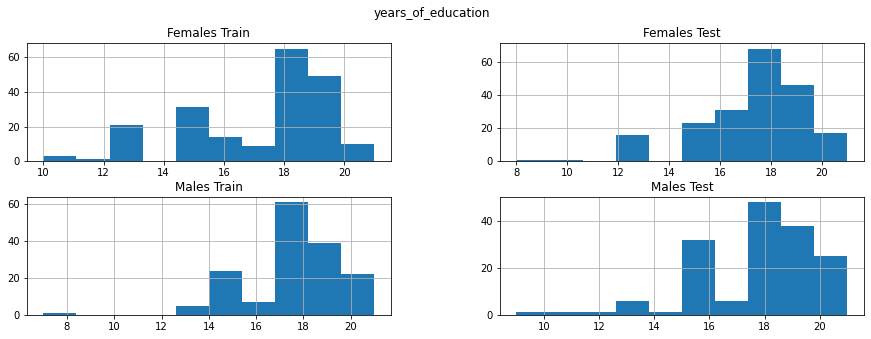

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15,5))
to_plot = 'years_of_education'
females_train.hist(to_plot, ax=axes[0, 0])
females_test.hist(to_plot, ax=axes[0, 1])
males_train.hist(to_plot, ax=axes[1, 0])
males_test.hist(to_plot, ax=axes[1, 1])
fig.suptitle(to_plot)
axes[0, 0].title.set_text('Females Train')
axes[0, 1].title.set_text('Females Test')
axes[1, 0].title.set_text('Males Train')
axes[1, 1].title.set_text('Males Test')
plt.show()

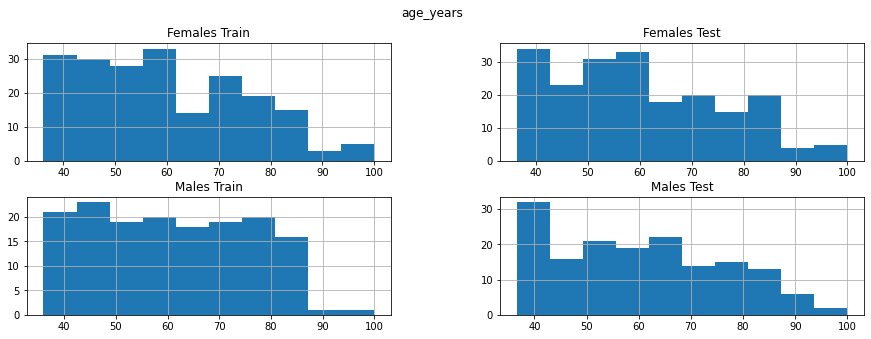

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(15,5))
to_plot = 'age_years'
females_train.hist(to_plot, ax=axes[0, 0])
females_test.hist(to_plot, ax=axes[0, 1])
males_train.hist(to_plot, ax=axes[1, 0])
males_test.hist(to_plot, ax=axes[1, 1])
fig.suptitle(to_plot)
axes[0, 0].title.set_text('Females Train')
axes[0, 1].title.set_text('Females Test')
axes[1, 0].title.set_text('Males Train')
axes[1, 1].title.set_text('Males Test')
plt.show()

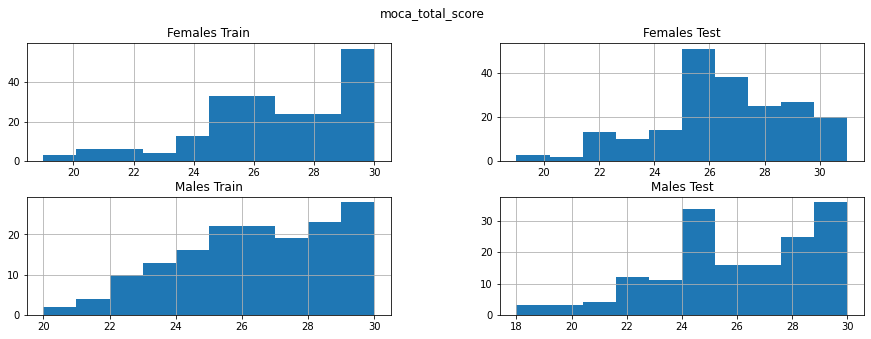

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15,5))
to_plot = 'moca_total_score'
females_train.hist(to_plot, ax=axes[0, 0])
females_test.hist(to_plot, ax=axes[0, 1])
males_train.hist(to_plot, ax=axes[1, 0])
males_test.hist(to_plot, ax=axes[1, 1])
fig.suptitle(to_plot)
axes[0, 0].title.set_text('Females Train')
axes[0, 1].title.set_text('Females Test')
axes[1, 0].title.set_text('Males Train')
axes[1, 1].title.set_text('Males Test')
plt.show()

In [29]:
# Test for significant differences between distributions
to_test = 'moca_total_score'

distr1 = females_train[to_test]
distr1 = females_test[to_test]
distr2 = males_train[to_test]
distr2 = males_test[to_test]


u_statistic, p_value = stats.mannwhitneyu(distr1, distr1)
print(f'Females\nU: {u_statistic}, \np: {p_value}\n')
u_statistic, p_value = stats.mannwhitneyu(distr2, distr2)
print(f'Males\nU: {u_statistic}, \np: {p_value}')

Females
U: 20604.5, 
p: 1.0

Males
U: 12800.0, 
p: 1.0


# Export data

In [30]:
females_train = females_train.reset_index(drop=True)
males_train = males_train.reset_index(drop=True)

females_test = females_train.reset_index(drop=True)
males_test = males_train.reset_index(drop=True)

In [31]:
males_train.to_csv('./data/cognitive/males_train.csv', index=False)
males_test.to_csv('./data/cognitive/males_test.csv', index=False)
females_train.to_csv('./data/cognitive/females_train.csv', index=False)
females_test.to_csv('./data/cognitive/females_test.csv', index=False)

In [32]:
test_females = pd.read_csv('./data/cognitive/females_train.csv')
test_males = pd.read_csv('./data/cognitive/males_train.csv')

In [33]:
test_females

,index,subject,sex,age_months,age_years,moca_total_score,years_of_education,fluidcog_unadjusted,fluidcog_age,fluidcog_np,...,orrt_np,pcps_unadjusted,pcps_age,pcps_np,picseq_unadjusted,picseq_age,picseq_np,pvt_age,pvt_unadjusted,pvt_np
0,431,HCA8321565,F,920,76.666667,27,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,450,HCA8421569,F,566,47.166667,27,16.0,97.0,95.0,37.0,...,25.0,103.0,105.0,63.0,84.0,82.0,12.0,84.0,95.0,14.0
2,279,HCA7447784,F,704,58.666667,27,18.0,113.0,130.0,98.0,...,94.0,111.0,118.0,89.0,96.0,105.0,63.0,127.0,126.0,96.0
3,368,HCA7964401,F,641,53.416667,25,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,574,HCA9160370,F,792,66.000000,26,18.0,92.0,97.0,999.0,...,NaN,79.0,85.0,NaN,115.0,122.0,999.0,102.0,108.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,624,HCA9449900,F,1016,84.666667,27,15.0,81.0,98.0,45.0,...,78.0,69.0,82.0,11.0,98.0,114.0,82.0,101.0,108.0,53.0
199,238,HCA7222558,F,503,41.916667,30,15.0,100.0,92.0,29.0,...,NaN,86.0,78.0,NaN,118.0,119.0,999.0,100.0,105.0,NaN
200,130,HCA6658994,F,676,56.333333,26,15.0,113.0,129.0,97.0,...,NaN,115.0,123.0,NaN,97.0,104.0,999.0,118.0,118.0,NaN
201,153,HCA6752784,F,702,58.500000,28,16.0,94.0,95.0,38.0,...,NaN,82.0,80.0,NaN,98.0,105.0,999.0,122.0,123.0,NaN


In [34]:
test_males

,index,subject,sex,age_months,age_years,moca_total_score,years_of_education,fluidcog_unadjusted,fluidcog_age,fluidcog_np,...,orrt_np,pcps_unadjusted,pcps_age,pcps_np,picseq_unadjusted,picseq_age,picseq_np,pvt_age,pvt_unadjusted,pvt_np
0,385,HCA8065472,M,456,38.000000,26,19.0,107.0,102.0,55.0,...,96.0,113.0,112.0,78.0,94.0,90.0,25.0,111.0,112.0,77.0
1,474,HCA8515578,M,962,80.166667,27,18.0,84.0,96.0,40.0,...,48.0,82.0,93.0,32.0,88.0,98.0,45.0,110.0,115.0,75.0
2,708,HCA9894315,M,1034,86.166667,26,21.0,99.0,999.0,999.0,...,NaN,101.0,NaN,NaN,87.0,999.0,999.0,NaN,111.0,NaN
3,182,HCA6910372,M,549,45.750000,28,18.0,100.0,95.0,999.0,...,NaN,105.0,104.0,NaN,94.0,93.0,999.0,115.0,114.0,NaN
4,487,HCA8596099,M,679,56.583333,29,20.0,120.0,140.0,99.0,...,97.0,120.0,130.0,98.0,127.0,140.0,99.0,127.0,127.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,706,HCA9882308,M,856,71.333333,27,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,560,HCA9086283,M,956,79.666667,25,20.0,93.0,116.0,85.0,...,70.0,103.0,127.0,96.0,89.0,98.0,44.0,115.0,120.0,83.0
156,635,HCA9496707,M,675,56.250000,24,15.0,82.0,78.0,7.0,...,3.0,74.0,73.0,4.0,87.0,92.0,30.0,84.0,94.0,14.0
157,606,HCA9342578,M,858,71.500000,29,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
